# Adaptive Signal Processing

## Steepest descent and Newton algorithms for noise canceler setup

In [1]:
import scipy
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import signal
from scipy import random
from scipy import linalg
import scipy.io.wavfile
from scipy import io

Question 1: To generate two sequence of the white noise, and apply to Steepest Descent and Newton method respectively:

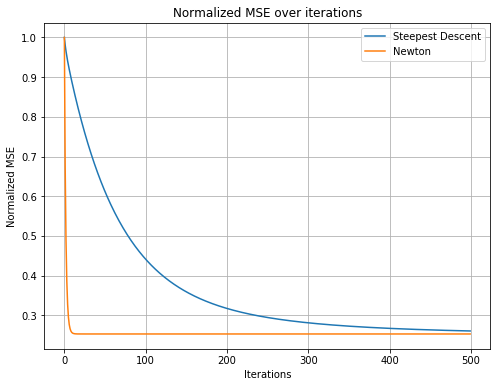

In [2]:
signal_length=10000

s = math.sqrt(1)*random.randn(signal_length)
v = math.sqrt(1)*random.randn(signal_length) 
d = signal.lfilter([3, 3/4], [1,0], s) + signal.lfilter([5, 5/3], [1,0], v)
x = signal.lfilter([1, 0], [1,-0.95], v)

corr_xx = (np.correlate(x,x, mode='full')[len(x)-1:])/len(x)
corr_dd = (np.correlate(d,d, mode='full')[len(d)-1:])/len(d)
corr_dx = (np.correlate(d,x, mode='full')[len(x)-1:])/len(x)
corr_xd = (np.correlate(x,d, mode='full'))/len(x)

power_d = np.mean(d**2)
power_x = np.mean(x**2)

R = np.matrix(scipy.linalg.toeplitz(corr_xx[0:3].conj(), corr_xx[0:3]))
p = np.matrix(corr_xd[(len(d)-1):(len(d)-4):-1]).T
wopt = np.matmul(np.linalg.inv(R), p)

mu_1 = 0.25/(3*power_x)
mu_2 =0.25

w_1=np.array([0,0,0]).reshape(3,1)
w_2=np.array([0,0,0]).reshape(3,1)

MSE_1=np.empty(500)
MSE_2=np.empty(500)

for i in range(0,500):
    MSE_SD=(power_d-2*(w_1.T).dot(p)+(w_1.T).dot(R).dot(w_1))/power_d
    MSE_NT=(power_d-2*(w_2.T).dot(p)+(w_2.T).dot(R).dot(w_2))/power_d

    MSE_1[i]=MSE_SD
    MSE_2[i]=MSE_NT
    
    w_1=w_1-mu_1*(R.dot(w_1)-p)
    w_2=w_2-mu_2*linalg.inv(R).dot(R.dot(w_2)-p)

plt.figure(figsize=(8,6))
plt.title('Normalized MSE over iterations')
plt.xlabel('Iterations')
plt.ylabel('Normalized MSE')
plt.plot(MSE_1,label='Steepest Descent')
plt.plot(MSE_2,label='Newton')
plt.grid()
plt.legend()
plt.show()

As the result shows, the Steepest Descent converged slowly, because the direction of the parameter update is perpendicular to the contour curve, while the second-order Newton method rapidly and directly converged to the optimum.<br>
After 500 iterations, the MSE generated by Newton method is relatively smaller than that from Steepest Descent.

Question 2: Now the input will be the .wav file and Steepest Descent and Newton methods are applied respectively.

At first, I programmed in a more intuitive way as I did in question 1, which use the original signal to do the auto-correlation and cross-correlation. But the given signal is very big, reaches almost $10^6$ samples in each signal series, hence it requires more time to compute the results:

In [3]:
ratex, x = io.wavfile.read('x.wav')
rated, d = io.wavfile.read('d.wav')

In [4]:
x=np.float64(x)
d=np.float64(d)

corr_xx = (np.correlate(x,x, mode='full')[len(x)-1:])/len(x)
corr_dd = (np.correlate(d,d, mode='full')[len(d)-1:])/len(d)
corr_dx = (np.correlate(d,x, mode='full')[len(x)-1:])/len(x)
corr_xd = (np.correlate(x,d, mode='full'))/len(x)

power_d = np.correlate(d,d)/len(d)
power_x = np.correlate(x,x)/len(x)

R = np.matrix(scipy.linalg.toeplitz(corr_xx[0:3].conj(), corr_xx[0:3]))
p = np.matrix(corr_xd[(len(d)-1):(len(d)-4):-1]).T
wopt = np.matmul(np.linalg.inv(R), p)

mu_1 = 0.25/(3*power_x[0])
mu_2 =0.25

w_1=np.array([0,0,0]).reshape(3,1)
w_2=np.array([0,0,0]).reshape(3,1)

MSE_1=np.empty(500)
MSE_2=np.empty(500)

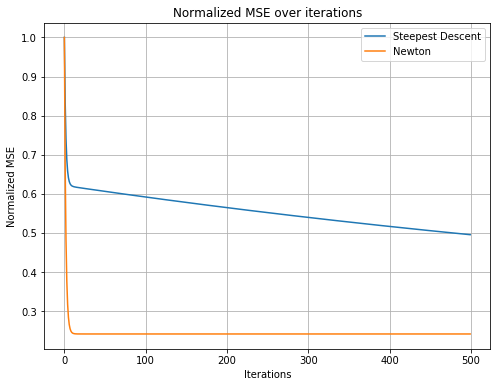

In [5]:
for i in range(0,500):
    MSE_SD=(power_d-2*(w_1.T).dot(p)+(w_1.T).dot(R).dot(w_1))/power_d
    MSE_NT=(power_d-2*(w_2.T).dot(p)+(w_2.T).dot(R).dot(w_2))/power_d

    MSE_1[i]=MSE_SD
    MSE_2[i]=MSE_NT
    
    w_1=w_1-mu_1*(R.dot(w_1)-p)
    w_2=w_2-mu_2*linalg.inv(R).dot(R.dot(w_2)-p)

plt.figure(figsize=(8,6))
plt.title('Normalized MSE over iterations')
plt.xlabel('Iterations')
plt.ylabel('Normalized MSE')
plt.plot(MSE_1,label='Steepest Descent')
plt.plot(MSE_2,label='Newton')
plt.grid()
plt.legend()
plt.show()

Actually, the $N=3$ in this case, therefore I don't need to compute the full length of the correlations. Right now, I only need to compute the first three terms of correlation to form matrix $R$ and vector $p$.

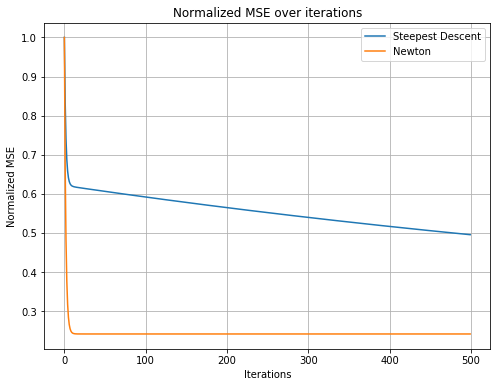

In [6]:
ratex, x = io.wavfile.read('x.wav')
rated, d = io.wavfile.read('d.wav')

x=np.float64(x)
d=np.float64(d)

corr_xx = np.zeros(3)
corr_xx[0] = np.correlate(x, x)/len(x)
corr_xx[1] = np.correlate(np.hstack((x,[0])), np.hstack(([0],x)))/len(x)
corr_xx[2] = np.correlate(np.hstack((x,[0,0])), np.hstack(([0,0],x)))/len(x)

corr_xd = np.zeros(3)
corr_xd[0] = np.correlate(x, d)/len(d)
corr_xd[1] = np.correlate(np.hstack(([0],x)), np.hstack((d,[0])))/len(d)
corr_xd[2] = np.correlate(np.hstack(([0,0],x)), np.hstack((d,[0,0])))/len(d)

power_d = np.correlate(d,d)/len(d)
power_x = np.correlate(x,x)/len(x)

R = np.matrix(scipy.linalg.toeplitz(corr_xx[0:3].conj(), corr_xx[0:3]))
p = np.matrix(corr_xd).T

wopt = np.matmul(np.linalg.inv(R), p)

mu_1 =np.float(0.25/(3 * power_x))
mu_2 =0.25

w_1=np.array([0,0,0]).reshape(3,1)
w_2=np.array([0,0,0]).reshape(3,1)

MSE_1=np.empty(500)
MSE_2=np.empty(500)
a=[]

for i in range(0,500):
    MSE_SD=(power_d-2*(w_1.T).dot(p)+(w_1.T).dot(R).dot(w_1))/power_d
    MSE_NT=(power_d-2*(w_2.T).dot(p)+(w_2.T).dot(R).dot(w_2))/power_d

    MSE_1[i]=MSE_SD
    MSE_2[i]=MSE_NT
    
    w_1 = w_1 - mu_1*(R.dot(w_1)-p)
    a.append(w_1)
    w_2 = w_2 - mu_2*linalg.inv(R).dot(R.dot(w_2)-p)

plt.figure(figsize=(8,6))
plt.title('Normalized MSE over iterations')
plt.xlabel('Iterations')
plt.ylabel('Normalized MSE')
plt.plot(MSE_1,label='Steepest Descent')
plt.plot(MSE_2,label='Newton')
plt.grid()
plt.legend()
plt.show()

l=len(x)
y=np.convolve(w_2.A1,x)
e=d-y[:l]

io.wavfile.write('e.wav', ratex, np.int16(e))



As the result shows, again, the Steepest Descent converged slowly, while the Newton method rapidly and directly converged to the optimum.<br>
After 500 iterations, the MSE generated by Newton method is relatively smaller than that from Steepest Descent.